<a href="https://colab.research.google.com/github/donw385/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Don_Wang_Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 


## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

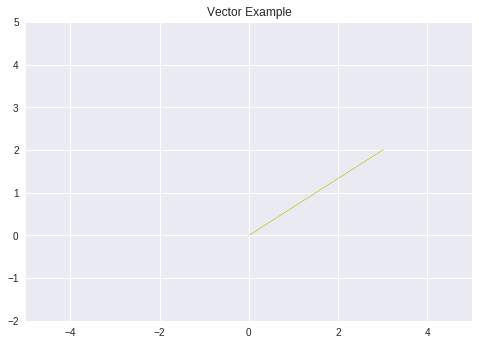

In [50]:
plt.arrow(0, 0, 3, 2, head_width=.02, head_length=0.01, color = 'y')
plt.xlim(-5,5)          
plt.ylim(-2,5)
plt.title('Vector Example')
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [7]:
#find norm of vector
#norm is length of vector. length is 17.61

b = [17,-4,-2,1]

print (np.linalg.norm(b))

17.60681686165901


## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [8]:
#dot product, answer is 42

c = [3,7,-2,12]
d = [9,-7,4,6]

np.dot(c,d)


42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [10]:
E = np.array([[7,4,2],[1,3,-1],[2,6,-4]])

E


array([[ 7,  4,  2],
       [ 1,  3, -1],
       [ 2,  6, -4]])

In [11]:
#E^-1 is inverse matrix

np.linalg.inv(E)

array([[ 0.17647059, -0.82352941,  0.29411765],
       [-0.05882353,  0.94117647, -0.26470588],
       [ 0.        ,  1.        , -0.5       ]])

In [12]:
#E^T is transposed matrix

E.T

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [13]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [16]:
customers: mean of 1,136 customers per day, variance of 98,762, and standard deviation of 314.26
snow: mean of 2.7 inches of new snow per day, variance of 8.57, and standard deviation of 2.93


df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


In [23]:
statistics.variance(customers)

98761.90476190476

In [24]:
statistics.variance(snow)

8.571428571428571

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
# No they are not, as the two variances are just measuring the spread of the numbers in that data set, 
# so are no comparable between datasets, as the maginitude of numbers are different between then. The customer variance number is much bigger
# than the snow variance, but given customers themselves are much greater the spread is less than that of snow when you compare variance to 
# the mean of the respective datasets, so comparing 2 numbers across datasets is misleading.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [25]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [27]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Country,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,England,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,Wales,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,Scotland,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,North Ireland,209,93,674,1033,143,586,355,187,334,1506,139


In [37]:
#need to drop Country
df.dtypes

Alcoholic Drinks       int64
Beverages              int64
Carcass_Meat           int64
Cereals                int64
Cheese                 int64
Confectionery          int64
Country               object
Fats_and_Oils          int64
Fish                   int64
Fresh_Fruit            int64
Fresh_Potatoes         int64
Fresh_Veg              int64
Other_Meat             int64
Other_Veg              int64
Processed_Potatoes     int64
Processed_Veg          int64
Soft_Drinks            int64
Sugars                 int64
dtype: object

In [48]:
#dropped country

df_numbers = df.drop(['Country'], axis=1)
df_numbers.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139


In [54]:
# standardized dataset. confirmed that mean is 0 and ST ~1

df_new = sklearn.preprocessing.scale(df_numbers)

df_new = pd.DataFrame(df_new)

df_new.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000,4.000000,4.000000e+00,4.000000,4.000000,4.000000,4.000000e+00,4.000000e+00,4.000000e+00
mean,0.000000,-5.551115e-17,0.000000,6.938894e-18,0.000000,5.551115e-17,6.938894e-18,0.000000,0.000000,0.000000,5.551115e-17,0.000000,0.000000,0.000000,-5.551115e-17,-2.775558e-17,-5.551115e-17
std,1.154701,1.154701e+00,1.154701,1.154701e+00,1.154701,1.154701e+00,1.154701e+00,1.154701,1.154701,1.154701,1.154701e+00,1.154701,1.154701,1.154701,1.154701e+00,1.154701e+00,1.154701e+00
min,-1.663384,-1.090266e+00,-1.277169,-8.555755e-01,-1.729885,-1.576656e+00,-1.097071e+00,-1.464967,-1.609137,-1.335847,-1.247006e+00,-1.483121,-1.283054,-1.260994,-1.098378e+00,-1.404236e+00,-1.137656e+00
25%,-0.337098,-6.230090e-01,-0.489873,-6.971356e-01,-0.030617,-4.978915e-01,-7.485897e-01,-0.615286,-0.445460,-0.671519,-8.441271e-01,-0.565440,-0.693036,-0.567447,-9.336213e-01,-6.774824e-01,-6.900536e-01
50%,0.410780,-2.595871e-01,-0.122468,-4.119437e-01,0.535805,3.042670e-01,-2.194142e-01,0.156263,0.339920,-0.007190,7.673883e-02,0.142132,-0.059314,-0.126099,-3.661260e-02,1.067548e-01,-2.051511e-01
75%,0.747878,3.634219e-01,0.367405,2.851918e-01,0.566422,8.021585e-01,5.291754e-01,0.771549,0.785380,0.664329,9.208660e-01,0.707572,0.633722,0.441348,8.970087e-01,7.842372e-01,4.849025e-01
max,0.841823,1.609440e+00,1.522105,1.679463e+00,0.658275,9.681224e-01,1.535899e+00,1.152440,0.929297,1.350227,1.093528e+00,1.198856,1.401682,1.513193,1.171603e+00,1.190727e+00,1.547958e+00


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [56]:
# Principal Component Analysis

# create the PCA instance
pca = PCA(2)
# fit on data
pca.fit(df_new)
# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
# transform data
B = pca.transform(df_new)
print("\n Projected Data: \n", B)


 Eigenvectors: 
 [[-0.25509484 -0.27747513  0.28562914 -0.17843996 -0.24572131 -0.25275834
  -0.12719487 -0.28611787 -0.27890521  0.09775901 -0.26544997 -0.26481055
  -0.28708628 -0.12073819 -0.25767815  0.22771961 -0.2811012 ]
 [ 0.23231808 -0.13773847 -0.07716993 -0.32902948  0.24708041  0.21105701
  -0.40054501 -0.01100602  0.08174644 -0.45468785 -0.0964863   0.13610704
  -0.09282322  0.41036129 -0.1539603   0.29323981 -0.13684092]]

 Eigenvalues: 
 [15.48765084  5.63749203]

 Projected Data: 
 [[-0.95448984  0.32831832]
 [-4.52095094 -1.73537967]
 [ 0.48797835  3.23367195]
 [ 4.98746242 -1.8266106 ]]


In [57]:
Projected = pd.DataFrame(B)
Projected

,0,1
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


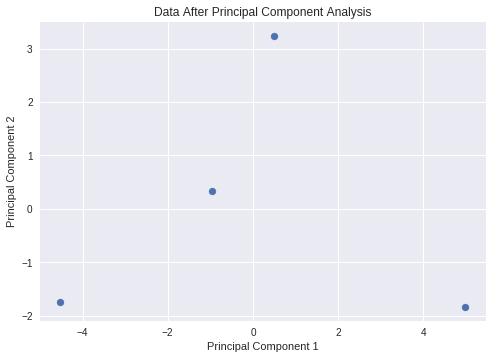

In [58]:
#graph PCA

plt.scatter(Projected[0], Projected[1])
plt.title("Data After Principal Component Analysis")
plt.ylabel('Principal Component 2')
plt.xlabel('Principal Component 1')
plt.show()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [0]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
##### Your Code Here #####